# Importing Libraries

In [1]:
#imporitng the packages required for model buildings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Reading, Exploring Dataset and Understanding Data

In [2]:
bike= pd.read_csv(r"D:\Downloads\Datascience\Credit Assignment\LINEAR REGRESSION -Assignment\day.csv")
bike.head() #Inspect first few rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
#check the shape
bike.shape

(730, 16)

In [5]:
#check dataframe for null and datatype 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#check the details of numeriacl data
bike.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### This shows that there is no NULL values in the dataset, so we do not need to do null value treatment in the dataset.

# Dropping the columns which are not needed.
- instant: This column is a row instance identifier and doesn't provide meaningful information for analysis. It can be dropped.
- dteday: This column captures day-to-day trends, but since you're not interested in that level of granularity and have other date-related columns (such as mnth and yr), you can drop it.
- casual and registered: These columns describe the target variable cnt in a straightforward way and are not available for prediction. Dropping them prevents data leakage and simplifies the analysis.

 ##### Creating a days_old variable to indicate how old the business is before dropping the dteday column is a good approach. It allows you to capture the business's age as a numerical feature, which might be useful for your analysis. The code you provided looks correct for calculating the number of days since January 1, 2018, for each row in the DataFrame.

In [7]:
bike['days_old'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days  
# .dt.days converts the time difference into days as an integer.

In [8]:
# Dropping casual and registered columns as we have cnt column which is sum of the both that is the target column
bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

# Droping instant column as it is index column which has nothing to do with target
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'], axis = 1, inplace = True)


In [9]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1500x3000 with 0 Axes>

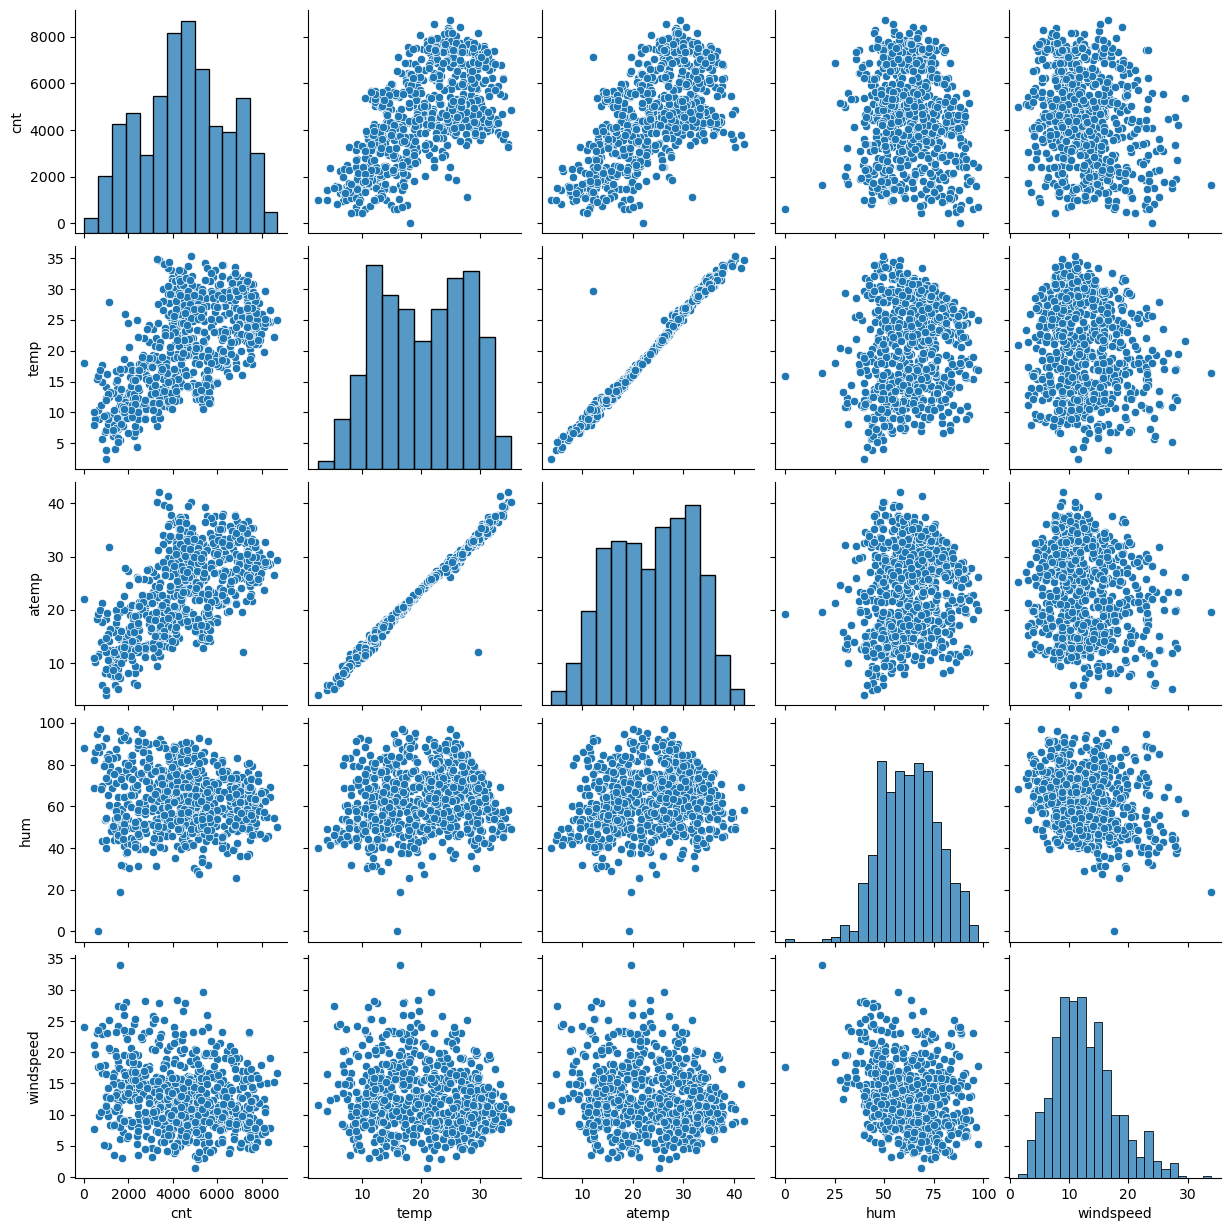

In [10]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [11]:
#Convert season and weathersit to categorical types
bike.season.replace({1:"Spring", 2:"Summer", 3:"Autumn", 4:"Winter"},inplace = True)

bike.weathersit.replace({1:'Good',2:'Moderate',3:'Bad',4:'Severe'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

bike.weekday = bike.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thur',5: 'Fri',6: 'Sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,Spring,0,Jan,0,Mon,1,Moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,0,Jan,0,Tue,1,Moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349,2
3,Spring,0,Jan,0,Thur,1,Good,8.200000,10.60610,59.0435,10.739832,1562,3
4,Spring,0,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600,4


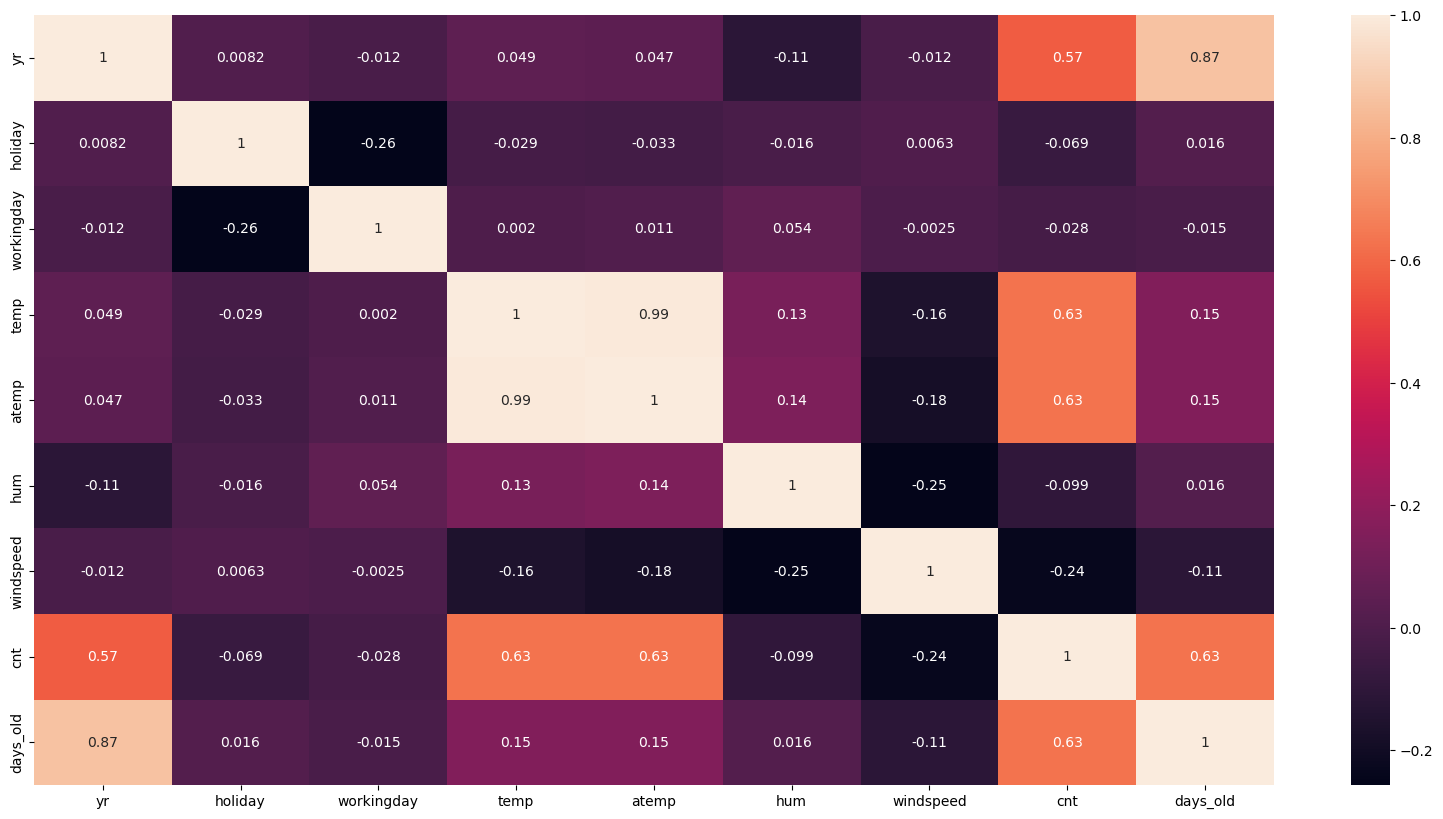

In [12]:
# Plotting of numerical variable to check the correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(bike.corr(), annot = True)
plt.show()

- We can drop atemp as its derived from because atemp as we can see the correlation between temp and atemp is approx 1.  
- We also see Target variable 'cnt' has a linear relationship with some of the indeptendent variables. Good sign for building a linear regression Model.

Below here we want to see some trend based on categorical variable for the dataset. So we want to see a plot to understand more details of it..

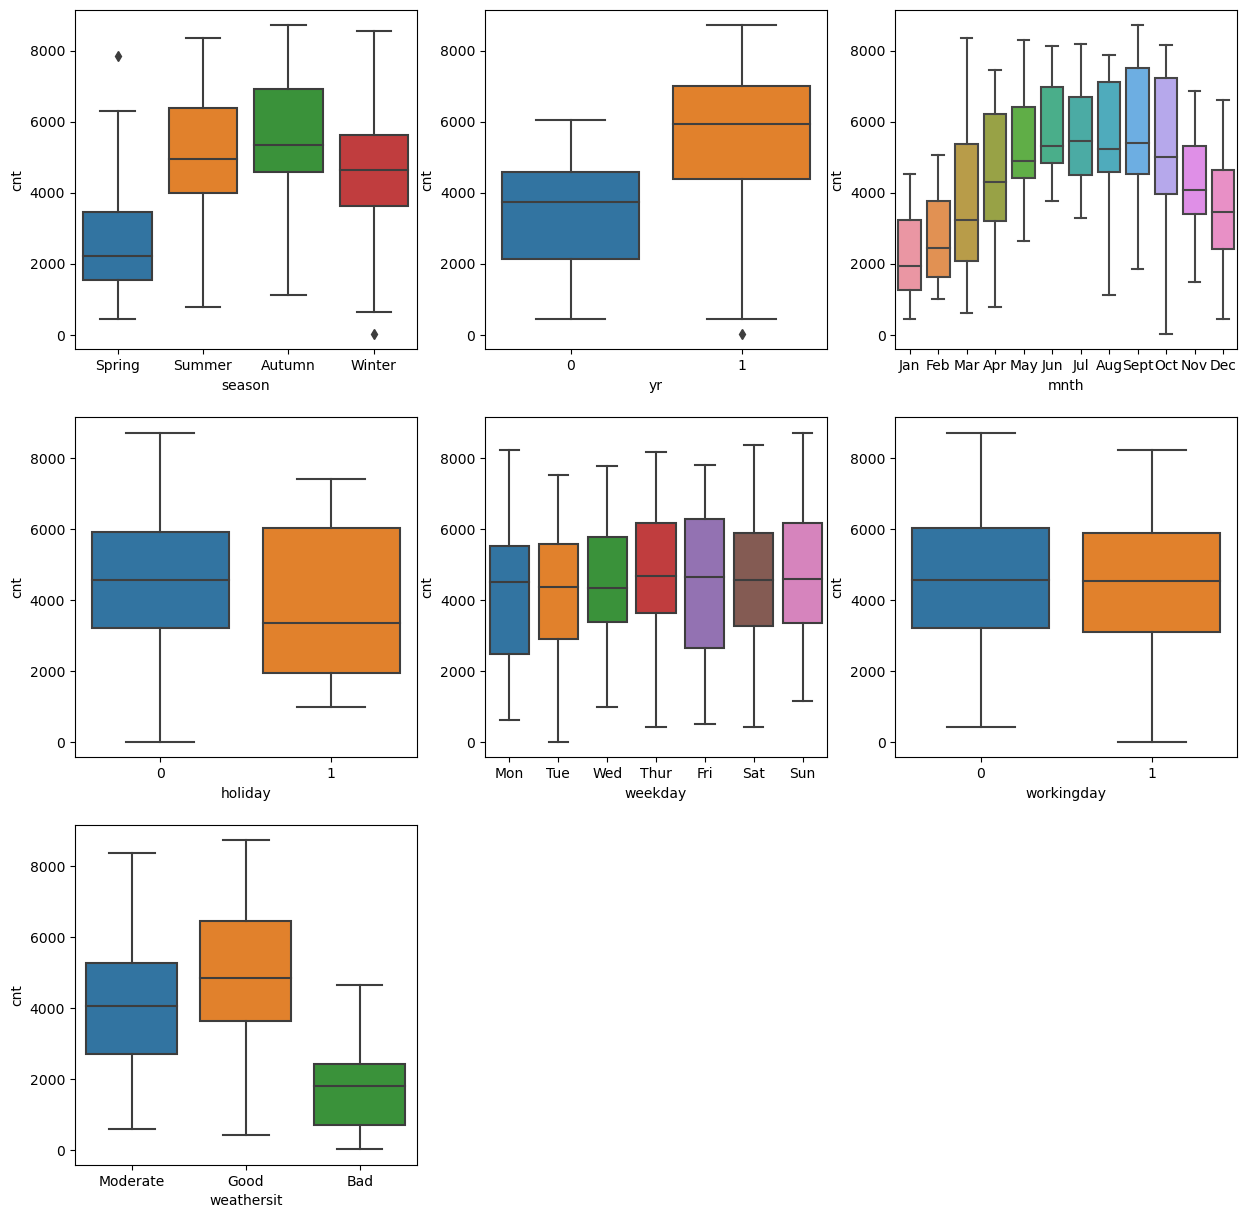

In [13]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()

### Some detail insights based on the plot
- Season: The fall season (represented by 3) exhibits the highest demand for rental bikes. This could be attributed to favorable weather conditions and scenic beauty during the fall season, which encourages outdoor activities like biking.
- Yearly Growth: It's evident that the demand for bike rentals has been growing year by year. This suggests a positive trend in the popularity of bike sharing, possibly due to increased awareness of its benefits.
- Monthly Trends: The demand for bike rentals shows an interesting monthly pattern. It steadily increases each month until June, with September experiencing the highest demand. The decline in demand after September might be related to the onset of cooler weather or other seasonal factors.
- Holiday Impact: There is a noticeable decrease in bike rental demand on holidays. This trend suggests that people tend to use bikes less on holidays, possibly because they have different leisure activities or travel plans.
- Weekday Variation: While there doesn't appear to be a strong correlation between weekdays and demand, further analysis might reveal subtle weekday-specific patterns that could be explored.
- Weather Impact: Clear weather conditions are associated with the highest demand for bike rentals. This indicates that people are more inclined to use bikes when the weather is favorable, which aligns with common sense.
- Seasonal Variations: It's worth noting the seasonality in bike rental demand. During September, when the weather is pleasant, bike sharing is at its peak. However, demand decreases during the year-end and beginning, possibly due to extreme weather conditions like winter.

# Data Preparation for Linear Regression

In [14]:
# Converting categorical variables to dummies
categorical_columns = ["season", "mnth", "weekday", "weathersit"]
bike = pd.get_dummies(data=bike, columns=categorical_columns, drop_first=True)

In [15]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_Spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Good,weathersit_Moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [16]:
#Print columns after creating dummies
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')

# Model Building

In [17]:
bike.shape

(730, 31)

In [18]:
#y to contain only target variable
y=bike.pop('cnt')
#X is all remaining variable also our independent variables
X=bike
#Distributing test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


# Scaling of Contineous Variables.

In [20]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
# Create a scaling object
scaler = StandardScaler()

In [22]:
#Fit and transform training set only
num_vars = ['temp','atemp','hum','windspeed','days_old']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [23]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Good,weathersit_Moderate
count,511.000000,511.000000,511.000000,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,1.703356e-16,-1.042871e-17,3.476236e-17,1.373113e-16,-5.214355e-17,0.230920,0.258317,...,0.09002,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.624266,0.346380
std,0.500067,0.163398,0.459303,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,0.421834,0.438138,...,0.28649,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.484786,0.476282
min,0.000000,0.000000,0.000000,-2.426671e+00,-2.474620e+00,-4.558466e+00,-2.237274e+00,-1.754936e+00,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.662834e-01,-8.145566e-01,-7.635563e-01,-7.168956e-01,-8.834486e-01,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.076170e-01,1.728600e-01,4.018002e-02,-1.625414e-01,3.032124e-02,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,8.554967e-01,8.077908e-01,7.163583e-01,6.018668e-01,8.830165e-01,0.000000,1.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.978457e+00,2.225353e+00,2.409813e+00,3.155398e+00,1.669939e+00,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building the model

In [24]:
# Building the linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

#Cut down number of features to 10 using RFE(Recursize Feature Elimination)
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [25]:
# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 

[ True  True False  True  True False False  True  True False  True  True
 False False False False  True  True  True False  True  True False False
 False False False False  True  True]
[ 1  1 14  1  1  8 10  1  1 12  1  1  6  9  5 11  1  1  1  7  1  1  2 15
 13 16  3  4  1  1]


In [26]:
col1 = X_train.columns[rfe.support_]
print(col1)
# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

Index(['yr', 'holiday', 'temp', 'atemp', 'days_old', 'season_Spring',
       'season_Winter', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'mnth_Sept', 'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')


,const,yr,holiday,temp,atemp,days_old,season_Spring,season_Winter,mnth_Aug,mnth_Jun,mnth_Mar,mnth_May,mnth_Oct,mnth_Sept,weathersit_Good,weathersit_Moderate
683,1.0,1,0,-0.985606,-0.960523,1.453829,0,1,0,0,0,0,0,0,0,1
645,1.0,1,1,-0.647121,-0.571139,1.275303,0,1,0,0,0,0,1,0,0,1
163,1.0,0,0,0.734280,0.749386,-0.989155,0,0,0,1,0,0,0,0,1,0
360,1.0,0,0,-0.967311,-0.941145,-0.063640,1,0,0,0,0,0,0,0,0,1
640,1.0,1,0,0.857783,0.733833,1.251813,0,1,0,0,0,0,1,0,0,1


In [27]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          5.41e-181
Time:                        20:55:36   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     495   BIC:                             8372.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1138.0169    

In [28]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,170.33
4,atemp,165.80
0,const,50.83
5,days_old,13.10
1,yr,10.75
14,weathersit_Good,8.88
15,weathersit_Moderate,8.76
7,season_Winter,4.23
6,season_Spring,3.10
12,mnth_Oct,1.59


##### There are lots of feature that exceed the desired range of vif, so now lets consider taking n_features_to_select=10


In [29]:
# Building the linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

#Cut down number of features to 10 using RFE(Recursize Feature Elimination)
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [30]:
# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)

[ True  True False False  True False False False  True False False False
 False False False False False  True  True False  True  True False False
 False False False False  True  True]
[ 1  1 19  6  1 13 15  4  1 17  2  5 11 14 10 16  3  1  1 12  1  1  7 20
 18 21  8  9  1  1]


In [31]:
col1 = X_train.columns[rfe.support_]
print(col1)
# Subsetting training data for 10 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

Index(['yr', 'holiday', 'atemp', 'season_Spring', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'mnth_Sept', 'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')


,const,yr,holiday,atemp,season_Spring,mnth_Mar,mnth_May,mnth_Oct,mnth_Sept,weathersit_Good,weathersit_Moderate
683,1.0,1,0,-0.960523,0,0,0,0,0,0,1
645,1.0,1,1,-0.571139,0,0,0,1,0,0,1
163,1.0,0,0,0.749386,0,0,0,0,0,1,0
360,1.0,0,0,-0.941145,1,0,0,0,0,0,1
640,1.0,1,0,0.733833,0,0,0,1,0,0,1


In [32]:
# Fitting the model with 10 variables
lm1 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          6.10e-183
Time:                        20:55:36   Log-Likelihood:                -4145.3
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     500   BIC:                             8359.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1599.1244    

In [33]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.16
9,weathersit_Good,8.64
10,weathersit_Moderate,8.54
4,season_Spring,1.93
3,atemp,1.83
7,mnth_Oct,1.10
8,mnth_Sept,1.10
6,mnth_May,1.09
5,mnth_Mar,1.08
2,holiday,1.02


#### dropping weathersit_Good as its having vif value more than 5, we can consider it but there is room for improvement 

In [34]:
X_train_rfe2.drop('weathersit_Good', axis = 1, inplace = True)

In [35]:
# Add a constant to the model
X_train_rfe3 = sm.add_constant(X_train_rfe2)
X_train_rfe3.head()

,const,yr,holiday,atemp,season_Spring,mnth_Mar,mnth_May,mnth_Oct,mnth_Sept,weathersit_Moderate
683,1.0,1,0,-0.960523,0,0,0,0,0,1
645,1.0,1,1,-0.571139,0,0,0,1,0,1
163,1.0,0,0,0.749386,0,0,0,0,0,0
360,1.0,0,0,-0.941145,1,0,0,0,0,1
640,1.0,1,0,0.733833,0,0,0,1,0,1


In [36]:
lm1 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     203.9
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          3.01e-161
Time:                        20:55:36   Log-Likelihood:                -4199.3
No. Observations:                 511   AIC:                             8419.
Df Residuals:                     501   BIC:                             8461.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3830.0838    

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3.68
4,season_Spring,1.92
3,atemp,1.80
7,mnth_Oct,1.10
8,mnth_Sept,1.10
6,mnth_May,1.09
5,mnth_Mar,1.08
9,weathersit_Moderate,1.02
1,yr,1.01
2,holiday,1.01


## Output:
Here VIF seems to be in acceptable range. p-value for all the features is under acceptable range of 0.05 and R2 is 0.786
All important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [38]:
col=X_train_rfe3.columns
col

Index(['const', 'yr', 'holiday', 'atemp', 'season_Spring', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'mnth_Sept', 'weathersit_Moderate'],
      dtype='object')

## Model Evalution

### Residual Analysis

In [39]:
y_train_pred=lm1.predict(X_train_rfe3)

In [40]:
res= y_train-y_train_pred

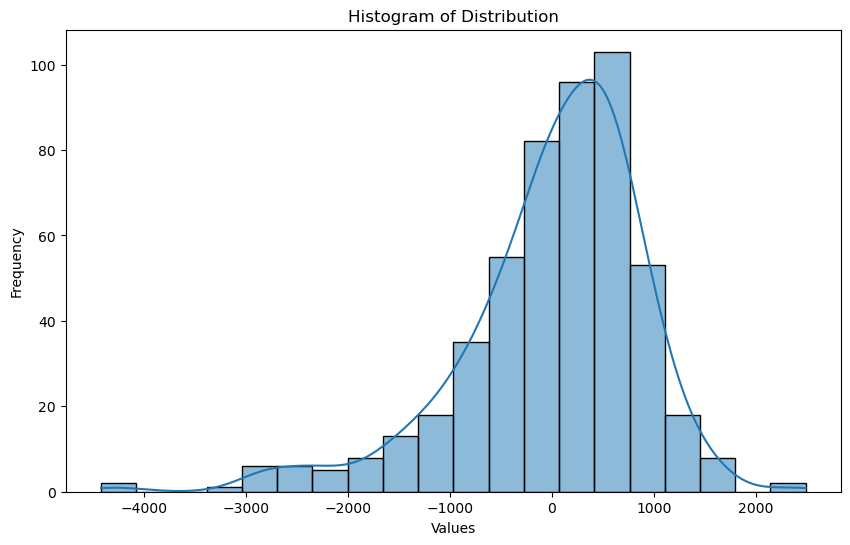

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=res, bins=20, kde=True)  # Adjust 'bins' as needed
plt.title('Histogram of Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Errors are normally distribured here with mean 0. So everything seems to be fine.
Some of the learning from the residual analysis:
- Good Model Fit: Normally distributed errors with a mean of 0 suggest that your model is a good fit for the data. It implies that, on average, your model's predictions are unbiased (i.e., the predicted values are, on average, close to the observed values).

- Valid Inferences: Normally distributed errors are essential for making valid statistical inferences using your model. This includes hypothesis testing, confidence intervals, and p-values. When errors are normally distributed, you can trust the results of these statistical tests.
 
- Prediction Accuracy: Normally distributed errors are also important for accurate predictions. They indicate that your model is making predictions that are centered around the true values, which is crucial when using the model for future predictions.

- Model Assumptions: Normally distributed errors are a key assumption of linear regression. When this assumption is met, it suggests that the relationship between the predictors and the target variable is correctly specified, and the model's errors are random and normally distributed.

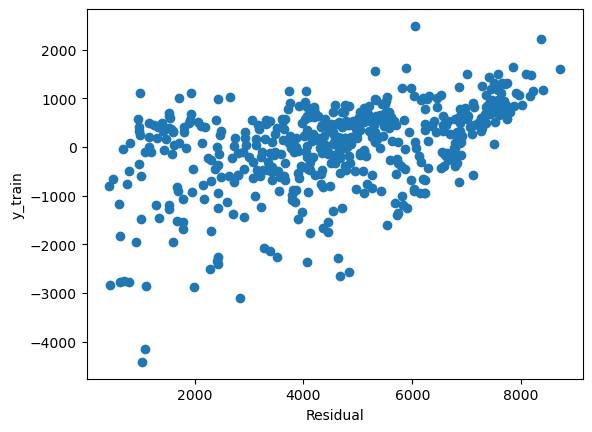

In [42]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [43]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7855435002292521

As we can see, R2 is same as we obtained for our final model for train data

### Predicting values for testdata 
We would first need to scale the test set as well. So let's start with that.

In [44]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [45]:
#Columns from our final model
cols=X_test.columns
#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [46]:
#Print R-squared Value
r2_score(y_test,y_test_pred)

0.8375455037625203

We can see that,  R2 is same as we obtained for our final model for train data(+5 to -5 range of R2 is acceptable). In summary, an R2 value of 0.837 for your test data suggests a reasonably good fit.

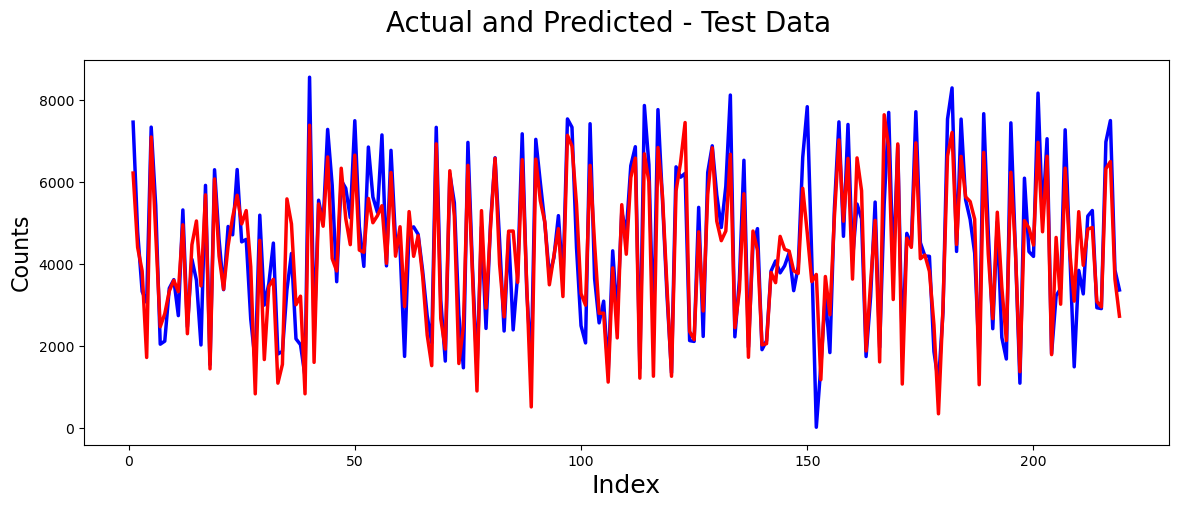

In [47]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted - Test Data', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)  
plt.show()

FINAL INSIGNTS FROM THE MODEL Summary
Year (yr):

1. Insight: Bike rentals have been increasing over the years.

- Business Implication: With a positive coefficient of approximately 2040.69, the business has seen consistent growth, possibly due to increased popularity, improved marketing, or service expansion. This trend suggests a positive outlook for the business.
Holiday:

2. Insight: Rentals tend to decrease on holidays.

- Business Implication: The negative coefficient of approximately -564.57 indicates that the business may experience reduced demand on holidays. Consider adjusting bike availability or promotions on holidays to counter this effect.
Temperature (atemp):

3. Insight: Warmer weather leads to more rentals.

- Business Implication: The positive coefficient of approximately 763.56 suggests that warm and comfortable weather conditions have a significant positive influence on bike rentals. Focus marketing efforts and promotions during favorable weather to attract more customers.
Season (season_Spring):

4. Insight: Spring has lower rentals compared to other seasons.

- Business Implication: The negative coefficient of approximately -1365.59 implies that spring may be a season with reduced demand for bike rentals. Plan season-specific marketing strategies or promotions to boost rentals during this time.
Month Variables (mnth_Mar, mnth_May, mnth_Oct, mnth_Sept):

5. Insight: March, May, October, and September are peak rental months.

- Business Implication: The positive coefficients (e.g., 432.69, 328.48, 760.50, 742.04) indicate that these months represent peak seasons or periods of increased bike usage. The business can focus on optimizing inventory, maintenance, and marketing efforts during these months to maximize revenue.
Weather (weathersit_Moderate):

6. Insight: Moderate weather reduces rentals.

- Business Implication: The negative coefficient of approximately -580.76 suggests that customers may be less inclined to rent bikes during moderate weather conditions when other transportation options are available. Consider offering incentives or promotions during such conditions to attract riders.
